# Case Study: Facial Key-Points Detection

<img src="https://github.com/ijoseff/ijoseff.github.io/blob/master/assets/img/portfolio/facial.png?raw=true" height='250' width='500'/>

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Case-Study:-Facial-Key-Points-Detection" data-toc-modified-id="Case-Study:-Facial-Key-Points-Detection-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Case Study: Facial Key-Points Detection</a></span></li><li><span><a href="#Introduction" data-toc-modified-id="Introduction-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Review" data-toc-modified-id="Review-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Review</a></span></li><li><span><a href="#Import-libraries-and-Data" data-toc-modified-id="Import-libraries-and-Data-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Import libraries and Data</a></span></li><li><span><a href="#Data-Exploration-and-Visualization" data-toc-modified-id="Data-Exploration-and-Visualization-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Data Exploration and Visualization</a></span></li><li><span><a href="#Image-Augmentation" data-toc-modified-id="Image-Augmentation-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Image Augmentation</a></span></li><li><span><a href="#Normalization-and-Training-Data-Preparation" data-toc-modified-id="Normalization-and-Training-Data-Preparation-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Normalization and Training Data Preparation</a></span></li><li><span><a href="#Create-Model-Architecture-(Residual-Neural-Network)" data-toc-modified-id="Create-Model-Architecture-(Residual-Neural-Network)-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Create Model Architecture (Residual Neural Network)</a></span></li><li><span><a href="#Compile-and-Train-deep-Learning-Model" data-toc-modified-id="Compile-and-Train-deep-Learning-Model-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Compile and Train deep Learning Model</a></span></li><li><span><a href="#Model-Evaluation" data-toc-modified-id="Model-Evaluation-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Model Evaluation</a></span></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></div>

# Introduction

Facial key-point detection serves as a basis for Emotional AI applications like detecting customer emotional responses to Ads and Driver monitoring Systems. In this project, a deep learning model based on Convolutional Neural Network and Residual Blocks to predict facial key points.

Affectiva is one of the leading players in Emotional AI and their software detects human emotion, complex cognitive states and behaviours. (https://www.affectiva.com/)

**Problem:**
 - Build and train a deep learning model based on Convolutional Neural Network and Residual blocks using Keras with Tensorflow 2.0 as a backend.
 - Assess the performance of trained CNN and ensure its generalization using various Key performance indicators.

**Dataset:**
 - The dataset consist of x and y coordinates of 15 facial key points.
 - Input images are 96 x 96 pixels
 - Images consist of only one color channel (Gray-scale images)
 
**Source:** Kaggle Competition

# Review

<img src="https://github.com/ijoseff/Facial-Key-Points-Detection/blob/master/history.png?raw=true" height='250' width='800'/>

<img src="https://github.com/ijoseff/Facial-Key-Points-Detection/blob/master/inputs.png?raw=true" height='250' width='800'/>

<img src="https://github.com/ijoseff/Facial-Key-Points-Detection/blob/master/convolutional.png?raw=true" height='250' width='800'/>

<img src="https://github.com/ijoseff/Facial-Key-Points-Detection/blob/master/framework1.png?raw=true" height='250' width='800'/>

<img src="https://github.com/ijoseff/Facial-Key-Points-Detection/blob/master/framework%202.png?raw=true" height='250' width='800'/>

# Import libraries and Data

In [1]:
# Import the necessary packages
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.python.keras import Sequential
from tensorflow.keras import layers, optimizers
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint, LearningRateScheduler
from IPython.display import display
from tensorflow.keras import backend as K
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
# load the data
facialpoints_df = pd.read_csv('KeyFacialPoints.csv')

# Data Exploration and Visualization

In [3]:
# Check the data
facialpoints_df.head()

left_eye_center_x  left_eye_center_y  right_eye_center_x  \
0          66.033564          39.002274           30.227008   
1          64.332936          34.970077           29.949277   
2          65.057053          34.909642           30.903789   
3          65.225739          37.261774           32.023096   
4          66.725301          39.621261           32.244810   

   right_eye_center_y  left_eye_inner_corner_x  left_eye_inner_corner_y  \
0           36.421678                59.582075                39.647423   
1           33.448715                58.856170                35.274349   
2           34.909642                59.412000                36.320968   
3           37.261774                60.003339                39.127179   
4           38.042032                58.565890                39.621261   

   left_eye_outer_corner_x  left_eye_outer_corner_y  right_eye_inner_corner_x  \
0                73.130346                39.969997                 36.356571   
1                70.722723                36.187166                 36.034723   
2                70.984421                36.320968                 37.678105   
3                72.314713                38.380967                 37.618643   
4                72.515926                39.884466                 36.982380   

   right_eye_inner_corner_y  ...  nose_tip_y  mouth_left_corner_x  \
0                 37.389402  ...   57.066803            61.195308   
1                 34.361532  ...   55.660936            56.421447   
2                 36.320968  ...   53.538947            60.822947   
3                 38.754115  ...   54.166539            65.598887   
4                 39.094852  ...   64.889521            60.671411   

   mouth_left_corner_y  mouth_right_corner_x  mouth_right_corner_y  \
0            79.970165             28.614496             77.388992   
1            76.352000             35.122383             76.047660   
2            73.014316             33.726316             72.732000   
3            72.703722             37.245496             74.195478   
4            77.523239             31.191755             76.997301   

   mouth_center_top_lip_x  mouth_center_top_lip_y  mouth_center_bottom_lip_x  \
0               43.312602               72.935459                  43.130707   
1               46.684596               70.266553                  45.467915   
2               47.274947               70.191789                  47.274947   
3               50.303165               70.091687                  51.561183   
4               44.962748               73.707387                  44.227141   

   mouth_center_bottom_lip_y  \
0                  84.485774   
1                  85.480170   
2                  78.659368   
3                  78.268383   
4                  86.871166   

                                               Image  
0  238 236 237 238 240 240 239 241 241 243 240 23...  
1  219 215 204 196 204 211 212 200 180 168 178 19...  
2  144 142 159 180 188 188 184 180 167 132 84 59 ...  
3  193 192 193 194 194 194 193 192 168 111 50 12 ...  
4  147 148 160 196 215 214 216 217 219 220 206 18...  

[5 rows x 31 columns]

In [4]:
# Check data info
facialpoints_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2140 entries, 0 to 2139
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   left_eye_center_x          2140 non-null   float64
 1   left_eye_center_y          2140 non-null   float64
 2   right_eye_center_x         2140 non-null   float64
 3   right_eye_center_y         2140 non-null   float64
 4   left_eye_inner_corner_x    2140 non-null   float64
 5   left_eye_inner_corner_y    2140 non-null   float64
 6   left_eye_outer_corner_x    2140 non-null   float64
 7   left_eye_outer_corner_y    2140 non-null   float64
 8   right_eye_inner_corner_x   2140 non-null   float64
 9   right_eye_inner_corner_y   2140 non-null   float64
 10  right_eye_outer_corner_x   2140 non-null   float64
 11  right_eye_outer_corner_y   2140 non-null   float64
 12  left_eyebrow_inner_end_x   2140 non-null   float64
 13  left_eyebrow_inner_end_y   2140 non-null   float

In [5]:
# Let's take a look at a sample image
facialpoints_df['Image'][1];

In [6]:
# Since values for the image is given as space separated string, we will need to separate the values using ' ' as separator.
# Then convert this into numpy array using np.fromstring and convert the obtained 1D array into 2D array of shape (96,96)
facialpoints_df['Image'] = facialpoints_df['Image'].apply(lambda x: np.fromstring(x, dtype= int, sep = ' ').reshape(96,96))

In [7]:
# Let's obtain the shape of the resized image
facialpoints_df['Image'][1].shape

(96, 96)

In [8]:
# Let's confirm that there are no null values 
facialpoints_df.isnull().sum()

left_eye_center_x            0
left_eye_center_y            0
right_eye_center_x           0
right_eye_center_y           0
left_eye_inner_corner_x      0
left_eye_inner_corner_y      0
left_eye_outer_corner_x      0
left_eye_outer_corner_y      0
right_eye_inner_corner_x     0
right_eye_inner_corner_y     0
right_eye_outer_corner_x     0
right_eye_outer_corner_y     0
left_eyebrow_inner_end_x     0
left_eyebrow_inner_end_y     0
left_eyebrow_outer_end_x     0
left_eyebrow_outer_end_y     0
right_eyebrow_inner_end_x    0
right_eyebrow_inner_end_y    0
right_eyebrow_outer_end_x    0
right_eyebrow_outer_end_y    0
nose_tip_x                   0
nose_tip_y                   0
mouth_left_corner_x          0
mouth_left_corner_y          0
mouth_right_corner_x         0
mouth_right_corner_y         0
mouth_center_top_lip_x       0
mouth_center_top_lip_y       0
mouth_center_bottom_lip_x    0
mouth_center_bottom_lip_y    0
Image                        0
dtype: int64

<function matplotlib.pyplot.show(*args, **kw)>

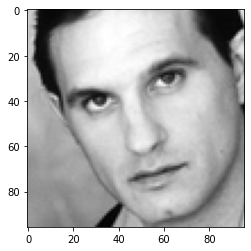

In [9]:
# Plot a random image from the dataset along with facial keypoints. 
i = np.random.randint(1, len(facialpoints_df))
plt.imshow(facialpoints_df['Image'][i],cmap='gray')
plt.show

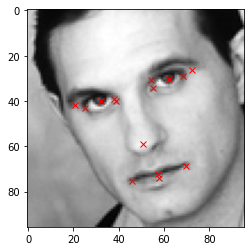

In [10]:
# The (x, y) coordinates for the 15 key features are plotted on top of the image
# Below is a for loop starting from index = 1 to 32 with step of 2
# In the first iteration j would be 1, followed by 3 and so on.
# since x-coordinates are in even columns like 0,2,4,.. and y-coordinates are in odd columns like 1,3,5,..
# we access their value using .loc command, which get the values for coordinates of the image based on the column it is refering to.
# in the first iteration df[i][j-1] would be df[i][0] refering the value in 1st column(x-coordinate) of the image in 'i' row.

plt.figure()
plt.imshow(facialpoints_df['Image'][i],cmap='gray')
for j in range(1,31,2):
        plt.plot(facialpoints_df.loc[i][j-1], facialpoints_df.loc[i][j], 'rx')

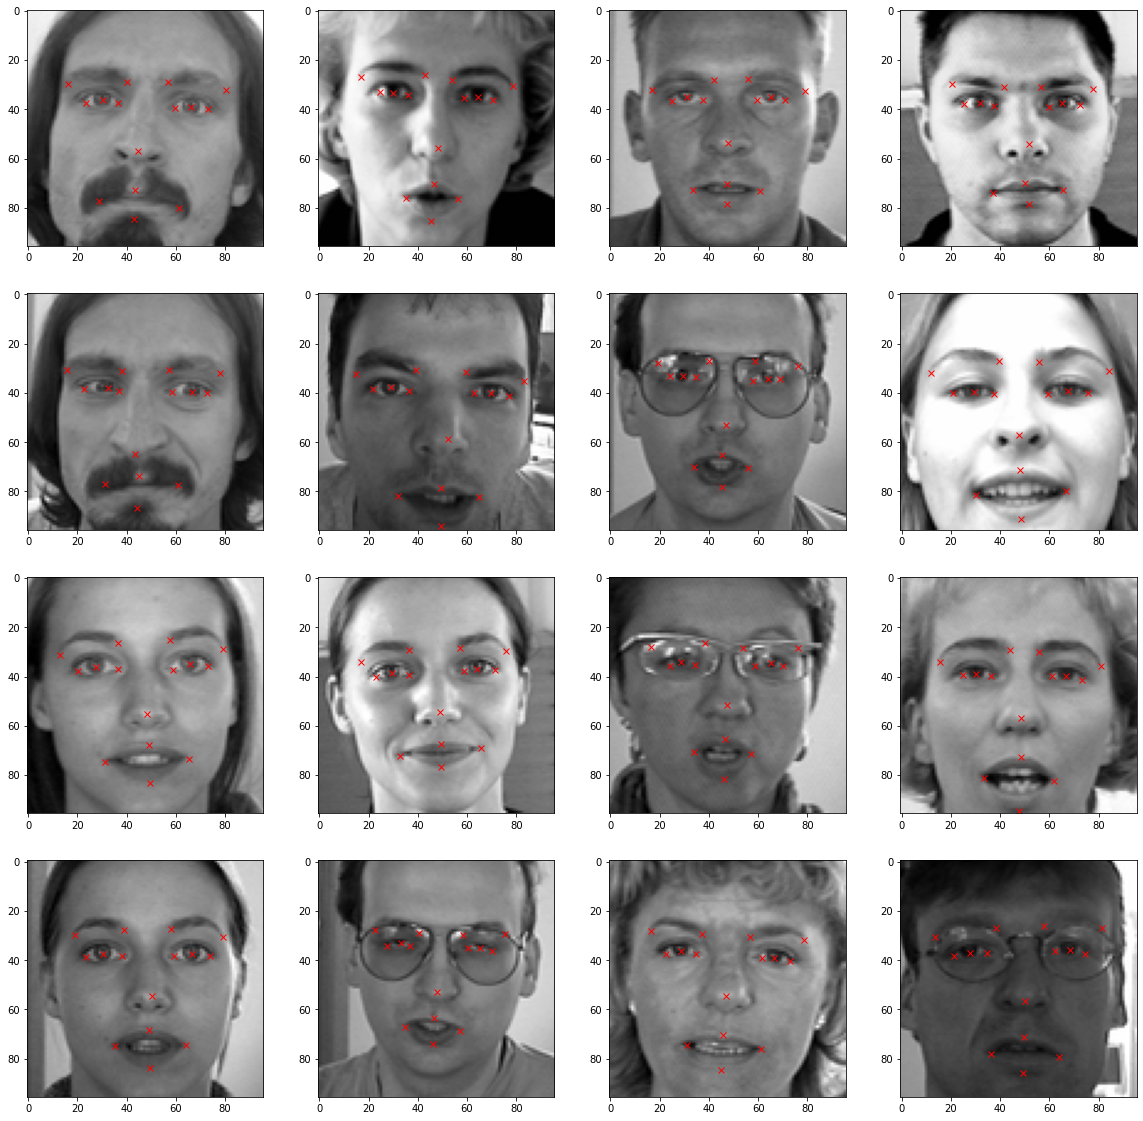

In [11]:
# Import library
import random

# Let's view more images in a grid format
fig = plt.figure(figsize=(20, 20))

for i in range(16):
    ax = fig.add_subplot(4, 4, i + 1)    
    image = plt.imshow(facialpoints_df['Image'][i], cmap = 'gray')
    for j in range(1,31,2):
        plt.plot(facialpoints_df.loc[i][j-1], facialpoints_df.loc[i][j], 'rx')

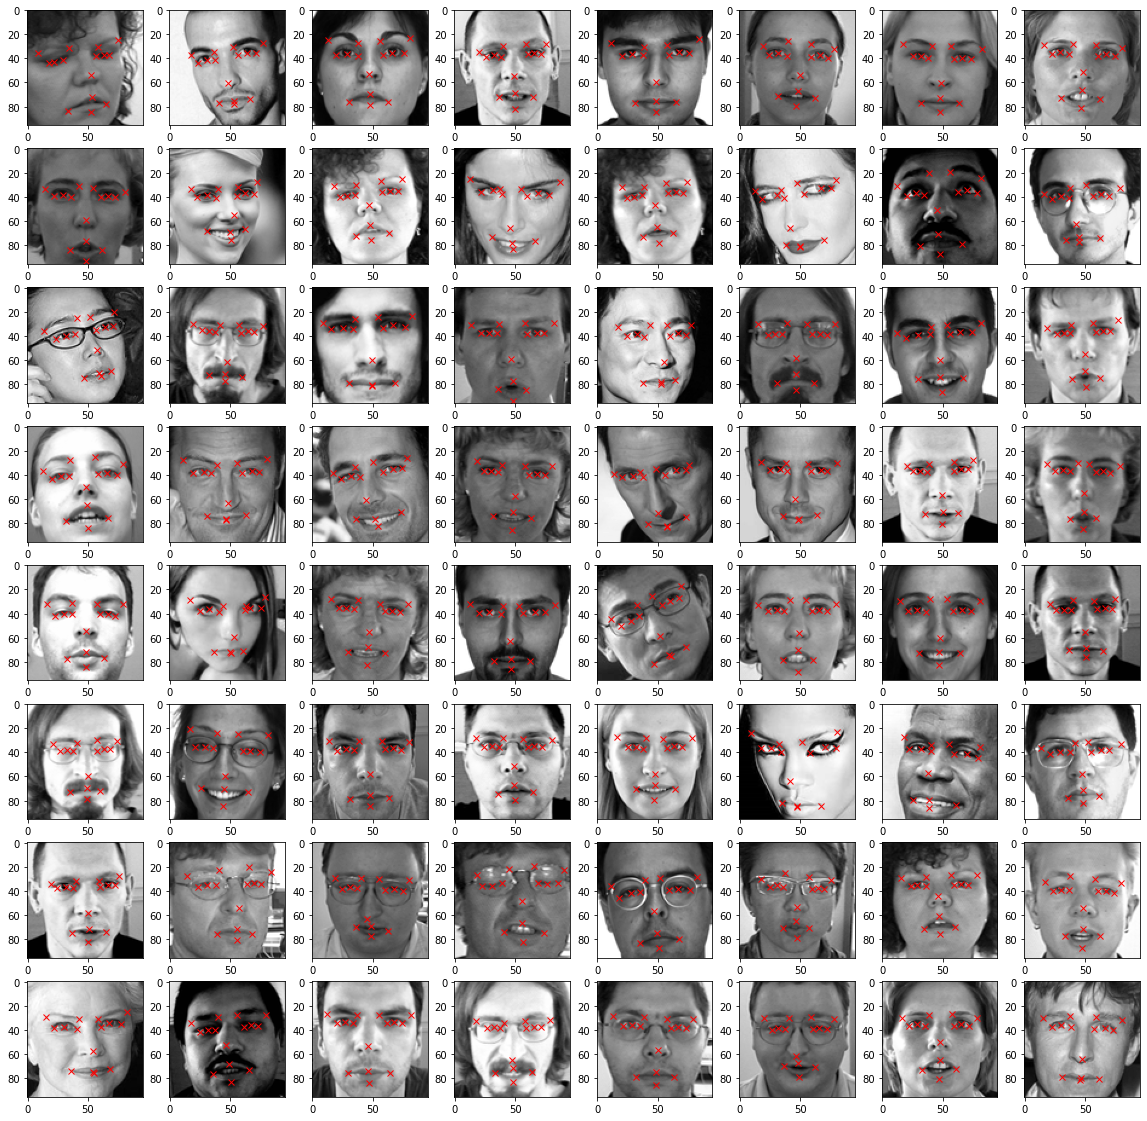

In [12]:
# Import library
import random

# Let's view more images in a grid format
fig = plt.figure(figsize=(20, 20))

for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1)   
    # Generate random number within a range
    img = np.random.randint(1, len(facialpoints_df))
    image = plt.imshow(facialpoints_df['Image'][img], cmap = 'gray')
    for j in range(1,31,2):
        plt.plot(facialpoints_df.loc[img][j-1], facialpoints_df.loc[img][j], 'rx')

# Image Augmentation

In [13]:
# Import library
import copy

# Create a new copy of the dataframe
facialpoints_df_copy = copy.copy(facialpoints_df)

In [14]:
# obtain the header of the DataFrame (names of columns) 
columns = facialpoints_df_copy.columns[:-1]

# Check Cloumns
columns

Index(['left_eye_center_x', 'left_eye_center_y', 'right_eye_center_x',
       'right_eye_center_y', 'left_eye_inner_corner_x',
       'left_eye_inner_corner_y', 'left_eye_outer_corner_x',
       'left_eye_outer_corner_y', 'right_eye_inner_corner_x',
       'right_eye_inner_corner_y', 'right_eye_outer_corner_x',
       'right_eye_outer_corner_y', 'left_eyebrow_inner_end_x',
       'left_eyebrow_inner_end_y', 'left_eyebrow_outer_end_x',
       'left_eyebrow_outer_end_y', 'right_eyebrow_inner_end_x',
       'right_eyebrow_inner_end_y', 'right_eyebrow_outer_end_x',
       'right_eyebrow_outer_end_y', 'nose_tip_x', 'nose_tip_y',
       'mouth_left_corner_x', 'mouth_left_corner_y', 'mouth_right_corner_x',
       'mouth_right_corner_y', 'mouth_center_top_lip_x',
       'mouth_center_top_lip_y', 'mouth_center_bottom_lip_x',
       'mouth_center_bottom_lip_y'],
      dtype='object')

In [15]:
# Take a look at the pixel values of a sample image and see if it makes sense!
facialpoints_df['Image'][0];

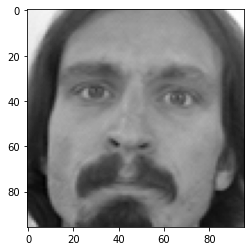

In [16]:
# plot the sample image
plt.imshow(facialpoints_df['Image'][0], cmap = 'gray')
plt.show()

In [17]:
# Now Let's flip the image column horizontally 
facialpoints_df_copy['Image'] = facialpoints_df_copy['Image'].apply(lambda x: np.flip(x, axis = 1))

In [18]:
# Now take a look at the flipped image and do a sanity check!
# Notice that the values of pixels are now flipped
facialpoints_df_copy['Image'][0];

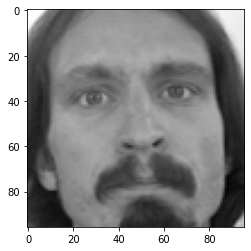

In [19]:
# Notice that the image is flipped now
plt.imshow(facialpoints_df_copy['Image'][0], cmap = 'gray')
plt.show()

In [20]:
# Since we are flipping the images horizontally, y coordinate values would be the same
# X coordinate values only would need to change, all we have to do is to subtract our initial x-coordinate values from width of the image(96)
for i in range(len(columns)):
  if i%2 == 0:
    facialpoints_df_copy[columns[i]] = facialpoints_df_copy[columns[i]].apply(lambda x: 96. - float(x) )

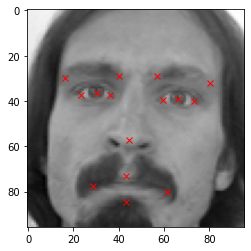

In [21]:
# View the Original image
plt.imshow(facialpoints_df['Image'][0],cmap='gray')
for j in range(1, 31, 2):
        plt.plot(facialpoints_df.loc[0][j-1], facialpoints_df.loc[0][j], 'rx')

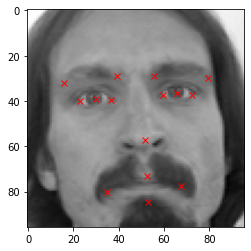

In [22]:
# View the Horizontally flipped image
plt.imshow(facialpoints_df_copy['Image'][0], cmap='gray')
for j in range(1, 31, 2):
        plt.plot(facialpoints_df_copy.loc[0][j-1], facialpoints_df_copy.loc[0][j], 'rx')

In [23]:
# Concatenate the original dataframe with the augmented dataframe
facialpoints_df_augmented = np.concatenate((facialpoints_df,facialpoints_df_copy))

In [24]:
# Check dimension
facialpoints_df_augmented.shape

(4280, 31)

In [25]:
# Import library
import random

# Let's try to perform another image augmentation by randomly increasing images brightness
# We multiply pixel values by random values between 1 and 2 to increase the brightness of the image
# we clip the value between 0 and 255
facialpoints_df_copy = copy.copy(facialpoints_df)
facialpoints_df_copy['Image'] = facialpoints_df['Image'].apply(lambda x:np.clip(random.uniform(1, 2) * x, 0.0, 255.0))
facialpoints_df_augmented = np.concatenate((facialpoints_df_augmented, facialpoints_df_copy))

# Check dimension
facialpoints_df_augmented.shape

(6420, 31)

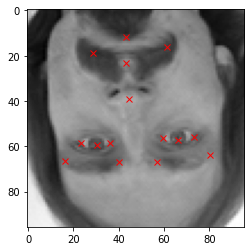

In [26]:
# Create another copy
facialpoints_df_copy = copy.copy(facialpoints_df)

# Flip the image column vertically (note that axis = 0) 
facialpoints_df_copy['Image'] = facialpoints_df_copy['Image'].apply(lambda x: np.flip(x, axis = 0))

facialpoints_df['Image'][0]

facialpoints_df_copy['Image'][0]

# Since we are flipping the images vertically, x coordinate values would be the same
# y coordinate values only would need to change, all we have to do is to subtract our initial y-coordinate values from width of the image(96)
for i in range(len(columns)):
  if i%2 == 1:
    facialpoints_df_copy[columns[i]] = facialpoints_df_copy[columns[i]].apply(lambda x: 96. - float(x) )
    
# View the Horizontally flipped image
plt.imshow(facialpoints_df_copy['Image'][0], cmap='gray')
for j in range(1, 31, 2):
        plt.plot(facialpoints_df_copy.loc[0][j-1], facialpoints_df_copy.loc[0][j], 'rx')

# Normalization and Training Data Preparation

In [27]:
# Obtain the value of 'Images' and normalize it
# Note that 'Images' are in the 31st column but since indexing start from 0, we refer 31st column by 30
img = facialpoints_df_augmented[:, 30]
img = img/255.

# Create an empty array of shape (10700, 96, 96, 1) to train the model
X = np.empty((len(img), 96, 96, 1))

# Iterate through the normalized images list and add image values to the empty array 
# Note that we need to expand it's dimension from (96,96) to (96,96,1)
for i in range(len(img)):
  X[i,] = np.expand_dims(img[i], axis = 2)

# Convert the array type to float32
X = np.asarray(X).astype(np.float32)
X.shape

(6420, 96, 96, 1)

In [28]:
# Obtain the values of key face points coordinates, which are to used as target.
y = facialpoints_df_augmented[:,:30]
y = np.asarray(y).astype(np.float32)
y.shape

(6420, 30)

In [29]:
# Split the data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)

In [30]:
# Check train data dimensions
X_train.shape, X_test.shape

((5778, 96, 96, 1), (642, 96, 96, 1))

In [32]:
# Check test data dimiensions
y_test.shape, y_test.shape

((642, 30), (642, 30))

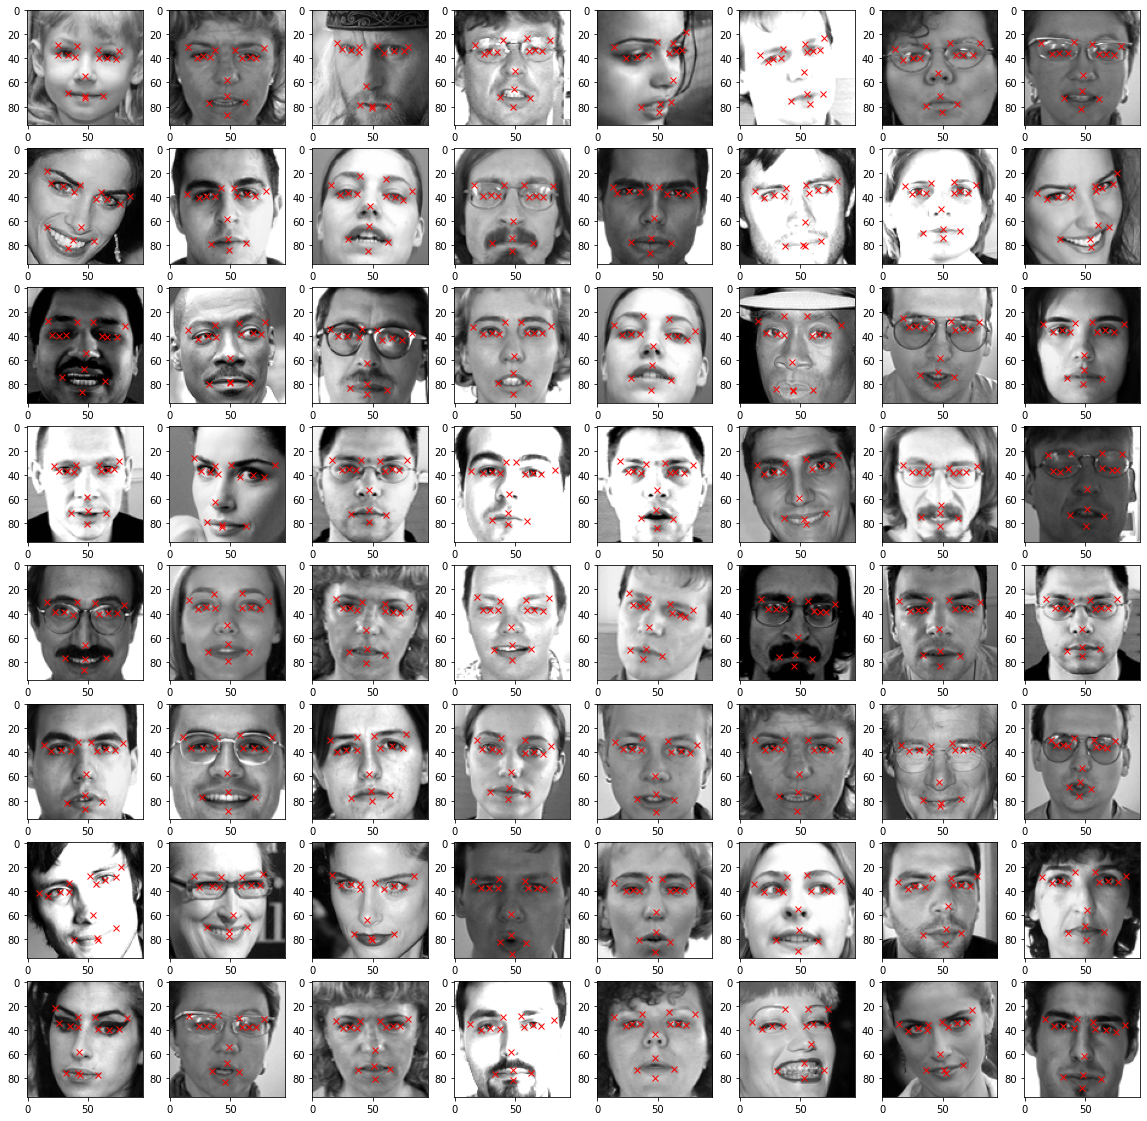

In [33]:
# Let's view more images in a grid format
fig = plt.figure(figsize=(20, 20))

for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1)    
    image = plt.imshow(X_train[i].reshape(96,96), cmap = 'gray')
    for j in range(1,31,2):
        plt.plot(y_train[i][j-1], y_train[i][j], 'rx')

# Create Model Architecture (Residual Neural Network)

In [34]:
def res_block(X, filter, stage):
    
  # CONVOLUTIONAL BLOCK
  X_copy = X
  f1 , f2, f3 = filter

  # Main Path
  X = Conv2D(f1, (1,1), strides = (1,1), name ='res_'+str(stage)+'_conv_a', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = MaxPool2D((2,2))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_conv_a')(X)
  X = Activation('relu')(X) 

  X = Conv2D(f2, kernel_size = (3,3), strides =(1,1), padding = 'same', name ='res_'+str(stage)+'_conv_b', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_conv_b')(X)
  X = Activation('relu')(X) 

  X = Conv2D(f3, kernel_size = (1,1), strides =(1,1),name ='res_'+str(stage)+'_conv_c', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_conv_c')(X)

  # Short path
  X_copy = Conv2D(f3, kernel_size = (1,1), strides =(1,1),name ='res_'+str(stage)+'_conv_copy', kernel_initializer= glorot_uniform(seed = 0))(X_copy)
  X_copy = MaxPool2D((2,2))(X_copy)
  X_copy = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_conv_copy')(X_copy)

  # Add data from main and short paths
  X = Add()([X,X_copy])
  X = Activation('relu')(X)
  
  # IDENTITY BLOCK 1
  X_copy = X
    
  # Main Path
  X = Conv2D(f1, (1,1),strides = (1,1), name ='res_'+str(stage)+'_identity_1_a', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_1_a')(X)
  X = Activation('relu')(X) 

  X = Conv2D(f2, kernel_size = (3,3), strides =(1,1), padding = 'same', name ='res_'+str(stage)+'_identity_1_b', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_1_b')(X)
  X = Activation('relu')(X) 

  X = Conv2D(f3, kernel_size = (1,1), strides =(1,1),name ='res_'+str(stage)+'_identity_1_c', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_1_c')(X)

  # Add both paths together (Note that we feed the original input as is hence the name "identity")
  X = Add()([X,X_copy])
  X = Activation('relu')(X)

  # IDENTITY BLOCK 2
  X_copy = X

  # Main Path
  X = Conv2D(f1, (1,1),strides = (1,1), name ='res_'+str(stage)+'_identity_2_a', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_2_a')(X)
  X = Activation('relu')(X) 

  X = Conv2D(f2, kernel_size = (3,3), strides =(1,1), padding = 'same', name ='res_'+str(stage)+'_identity_2_b', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_2_b')(X)
  X = Activation('relu')(X) 

  X = Conv2D(f3, kernel_size = (1,1), strides =(1,1),name ='res_'+str(stage)+'_identity_2_c', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_2_c')(X)

  # Add both paths together (Note that we feed the original input as is hence the name "identity")
  X = Add()([X,X_copy])
  X = Activation('relu')(X)

  return X

In [35]:
input_shape = (96,96,1)

# Input tensor shape
X_input = Input(input_shape)

# Zero-padding
X = ZeroPadding2D((3,3))(X_input)

# Stage #1
X = Conv2D(64, (7,7), strides= (2,2), name = 'conv1', kernel_initializer= glorot_uniform(seed = 0))(X)
X = BatchNormalization(axis =3, name = 'bn_conv1')(X)
X = Activation('relu')(X)
X = MaxPooling2D((3,3), strides= (2,2))(X)

# Stage #2
X = res_block(X, filter= [64,64,256], stage= 2)

# Stage #3
X = res_block(X, filter= [128,128,512], stage= 3)

# Average Pooling
X = AveragePooling2D((2,2), name = 'Averagea_Pooling')(X)

# Final layer
X = Flatten()(X)
X = Dense(4096, activation = 'relu')(X)
X = Dropout(0.2)(X)
X = Dense(2048, activation = 'relu')(X)
X = Dropout(0.1)(X)
X = Dense(30, activation = 'relu')(X)

model = Model( inputs= X_input, outputs = X)
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 96, 96, 1)]  0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, 102, 102, 1)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 48, 48, 64)   3200        zero_padding2d[0][0]             
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 48, 48, 64)   256         conv1[0][0]                      
______________________________________________________________________________________________

# Compile and Train deep Learning Model

In [37]:
#  Pick optimizer
adam = tf.keras.optimizers.Adam(lr = 0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)

# Compile model
model.compile(loss="mean_squared_error", optimizer = adam, metrics = ['accuracy'])

In [38]:
# Save the best model with least validation loss
checkpointer = ModelCheckpoint(filepath = "weights.hdf5", verbose = 1, save_best_only = True)

In [39]:
history = model.fit(X_train, y_train, batch_size = 256, epochs= 100, validation_split = 0.05, callbacks=[checkpointer])

Epoch 1/100
22/22 [==============================] - ETA: 0s - loss: 347.7941 - accuracy: 0.3780 
Epoch 00001: val_loss improved from inf to 2080.01465, saving model to weights.hdf5
22/22 [==============================] - 391s 18s/step - loss: 347.7941 - accuracy: 0.3780 - val_loss: 2080.0146 - val_accuracy: 0.6747
Epoch 2/100
22/22 [==============================] - ETA: 0s - loss: 133.9629 - accuracy: 0.6251 
Epoch 00002: val_loss improved from 2080.01465 to 1629.81067, saving model to weights.hdf5
22/22 [==============================] - 438s 20s/step - loss: 133.9629 - accuracy: 0.6251 - val_loss: 1629.8107 - val_accuracy: 0.6747
Epoch 3/100
22/22 [==============================] - ETA: 0s - loss: 88.8106 - accuracy: 0.6069 
Epoch 00003: val_loss improved from 1629.81067 to 1261.41711, saving model to weights.hdf5
22/22 [==============================] - 479s 22s/step - loss: 88.8106 - accuracy: 0.6069 - val_loss: 1261.4171 - val_accuracy: 0.6747
Epoch 4/100
22/22 [===============

KeyboardInterrupt: 

In [ ]:
# Save trained model
model_json = model.to_json()
with open('KeyPointDetector.json', 'w') as json_file:
        json_file.write(model_json)

# Model Evaluation

In [40]:
# My laptop is very slow, it would take a lifetime to finish the training.
# Instead of training from scratch, just a load trained model weights.
with open('KeyPointDetector.json', 'r') as json_file:
    json_SavedModel = json_file.read()
model = tf.keras.models.model_from_json(json_SavedModel)
model.load_weights('weights.hdf5')
model.compile(loss="mean_squared_error", optimizer = adam, metrics = ['accuracy'])

In [41]:
# Evaluate trained model
result = model.evaluate(X_test,y_test)
print("Accuracy : {}".format(result[1]))

21/21 [==============================] - 5s 257ms/step - loss: 476.0299 - accuracy: 0.6900
Accuracy : 0.6900311708450317


In [42]:
# Make prediction using the testing dataset
df_predict = model.predict(X_test)

In [43]:
# Import library
from sklearn.metrics import mean_squared_error
from math import sqrt

# Print the rmse loss values
rms = sqrt(mean_squared_error(y_test, df_predict))
print("RMSE value : {}".format(rms))

RMSE value : 21.818107518156292


In [44]:
# Convert the predicted values into a dataframe
df_predict= pd.DataFrame(df_predict, columns = columns)
df_predict.head()

left_eye_center_x  left_eye_center_y  right_eye_center_x  \
0          22.778009          28.818249           52.856094   
1          22.509260          28.501558           52.419891   
2          22.428795          28.491047           52.655380   
3          22.678215          28.647377           52.625305   
4          22.612787          28.692408           52.836418   

   right_eye_center_y  left_eye_inner_corner_x  left_eye_inner_corner_y  \
0           29.326164                28.165041                29.808807   
1           28.984007                27.981737                29.490114   
2           28.969599                27.918726                29.507660   
3           29.127613                28.127213                29.641539   
4           29.142765                28.130503                29.621716   

   left_eye_outer_corner_x  left_eye_outer_corner_y  right_eye_inner_corner_x  \
0                17.324516                29.893482                 47.958397   
1                17.245420                29.668568                 47.613380   
2                16.980984                29.697350                 47.646870   
3                17.355888                29.836592                 47.707329   
4                17.300056                29.803293                 47.931747   

   right_eye_inner_corner_y  ...  nose_tip_x  nose_tip_y  mouth_left_corner_x  \
0                 29.761343  ...   38.798412   43.810204            25.850697   
1                 29.395571  ...   38.465717   43.369198            25.675537   
2                 29.427084  ...   38.576267   43.257053            25.575991   
3                 29.529728  ...   38.675137   43.555832            25.798347   
4                 29.574932  ...   38.747307   43.543362            25.778595   

   mouth_left_corner_y  mouth_right_corner_x  mouth_right_corner_y  \
0            59.173306             49.213085             58.788628   
1            58.526833             48.818245             58.200172   
2            58.691360             48.943867             58.236973   
3            58.779263             49.020725             58.477512   
4            58.861271             49.183014             58.555443   

   mouth_center_top_lip_x  mouth_center_top_lip_y  mouth_center_bottom_lip_x  \
0               38.003124               55.552040                  37.594334   
1               37.682991               55.026527                  37.400166   
2               37.665890               54.949150                  37.336044   
3               37.842480               55.258682                  37.500546   
4               37.934826               55.312286                  37.624649   

   mouth_center_bottom_lip_y  
0                  65.537857  
1                  64.956757  
2                  65.125656  
3                  65.259003  
4                  65.364517  

[5 rows x 30 columns]

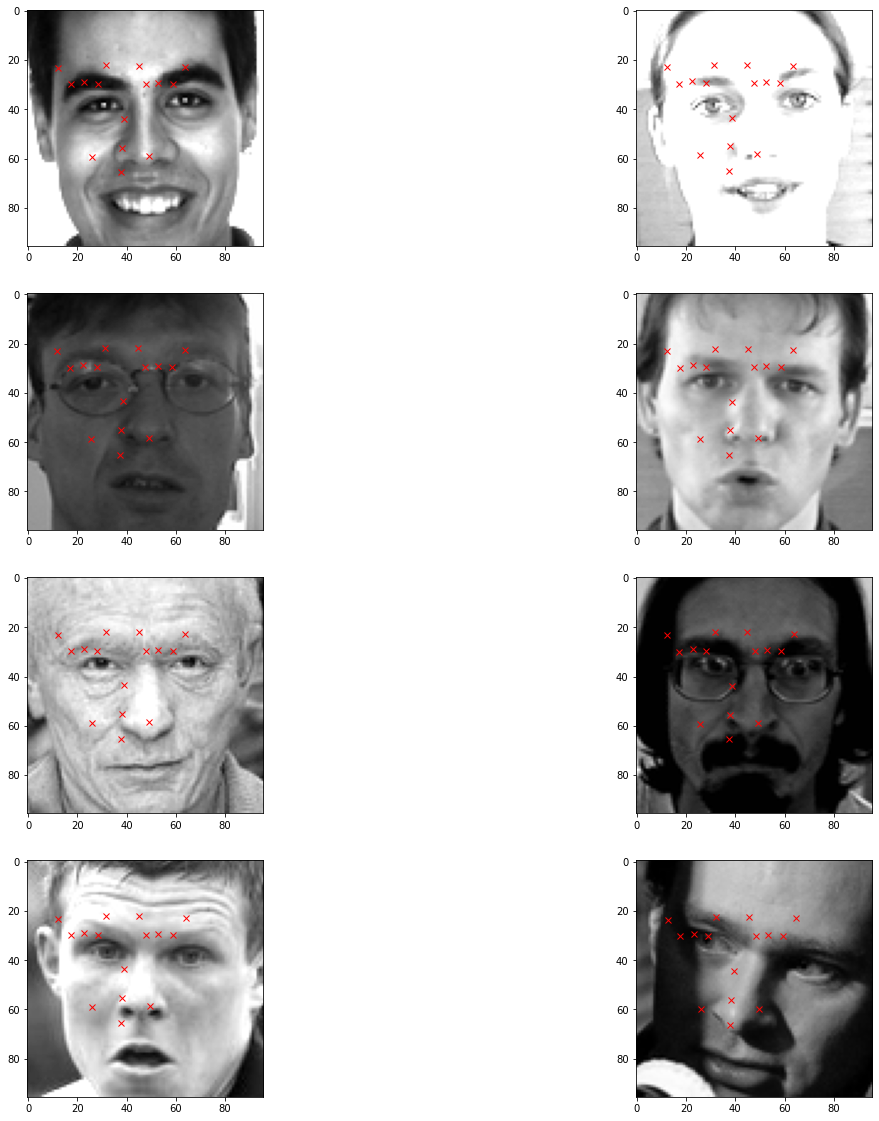

In [46]:
# Plot the test images and their predicted keypoints
fig = plt.figure(figsize=(20, 20))

for i in range(8):
    ax = fig.add_subplot(4, 2, i + 1)
    # Using squeeze to convert the image shape from (96,96,1) to (96,96)
    plt.imshow(X_test[i].squeeze(),cmap='gray')
    for j in range(1,31,2):
            plt.plot(df_predict.loc[i][j-1], df_predict.loc[i][j], 'rx')

# Conclusion

Model architecture were built properly but obtained a 21.81 root mean squared error. It is probably due to lack of iteration during the training. Some points are not align properly in the face but there also points somehow able to fit and possible reasons for that because of image augmentation. Image augmentation was needed to implement to avoid machine from memorizing the key point's distance. The model can be further improve by increasing the iteration .